In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
data = data.drop_duplicates()
data = data.reset_index(drop = True)
display(data)

Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor           2/24/11         Employed      F   56274  ...   
1     Bachelor           1/31/11       Unemployed      F       0  ...   
2     Bachelor           2/19/11         Employed      F   48767  ...   
3     Bachelor           1/20/11       Unemployed      M       0  ...   
4     Bachelor            2/3/11         Employed      M   43836  ...   
...        ...               ...              ...    ...     ...  ...   
9129  Bachelor           2/10/11         Employed      M   71941  ...   
9130   College           2/12/11         Employed      F   21604  ...   
9131  Bachelor            2/6/11       Unemployed      M       0  ...   
9132   College            2/3/11         Employed      M   21941  ...   
9133   College           2/14/11       Unemployed      M       0  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                                5                         0   
1                               42                         0   
2                               38                         0   
3                               65                         0   
4                               44                         0   
...                            ...                       ...   
9129                            89                         0   
9130                            28                         0   
9131                            37                         3   
9132                             3                         0   
9133                            90                         0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                      1  Corporate Auto  Corporate L3            Offer1   
1                      8   Personal Auto   Personal L3            Offer3   
2                      2   Personal Auto   Personal L3            Offer1   
3                      7  Corporate Auto  Corporate L2            Offer1   
4                      1   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
9129                   2   Personal Auto   Personal L1            Offer2   
9130                   1  Corporate Auto  Corporate L3            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9132                   3   Personal Auto   Personal L2            Offer3   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
9129            Web         198.234764  Four-Door Car      Medsize  
9130         Bran

In [2]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [3]:
def the_perfect_plot(df):
    #standardize headers
    cols = []
    for col in df.columns:
        cols.append(col.lower().replace(' ', '_'))
    df.columns = cols
    #Rounding up total claim amount and customer lifetime value columns to 2 decimals
    df['total_claim_amount'] = df['total_claim_amount'].round(decimals = 2)
    df['customer_lifetime_value'] = df['customer_lifetime_value'].round(decimals = 2)
    #Displaying Df info
    print("This is the dataframe info: \n")
    display(data.info())
    #Describe Df
    print("This is the dataframe description: \n")
    display(df.describe())
    #Show a plot of the total number of responses.
    print("Plot showing total number of responses") 
    fig, ax = plt.subplots()
    ax.scatter(x=(data['response'] == 'Yes').sum(), y=len(data['response']))
    ax.set_xlabel('Responses')
    ax.set_ylabel('Calls')
    ax.set_title('Total number of responses')
    return df


This is the dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_au

None

This is the dataframe description: 



customer_lifetime_value        income  monthly_premium_auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940473  37657.380009             93.219291   
std                6870.967599  30379.904734             34.407967   
min                1898.010000      0.000000             61.000000   
25%                3994.250000      0.000000             68.000000   
50%                5780.180000  33889.500000             83.000000   
75%                8962.170000  62320.000000            109.000000   
max               83325.380000  99981.000000            298.000000   

       months_since_last_claim  months_since_policy_inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088834  
std                     0.910384            2.390182          290.500043  
min                     0.000000            1.000000            0.100000  
25%                     0.000000            1.000000          272.260000  
50%                     0.000000            2.000000          383.945000  
75%                     0.000000            4.000000          547.515000  
max                     5.000000            9.000000         2893.240000

Plot showing total number of responses


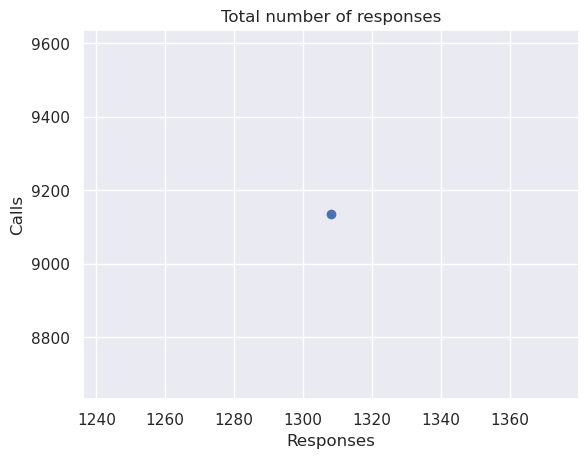

In [4]:
data = the_perfect_plot(data)

**Calculate rates**

Number of responses (Yes VS No)

14.32
85.68


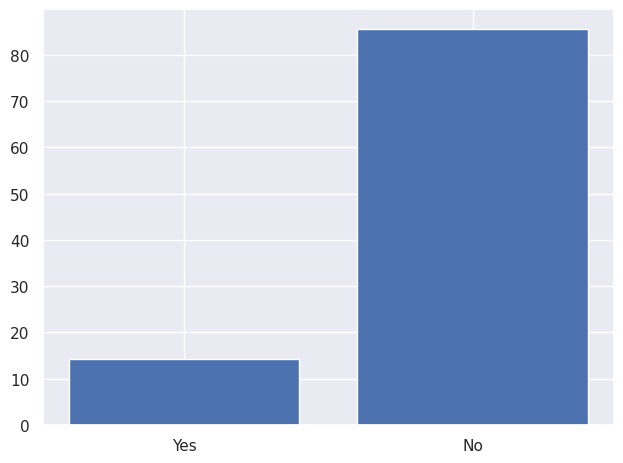

In [5]:
rate_response_yes = round((data['response'] == 'Yes').sum()/data.shape[0]*100, 2)
rate_response_no = round((data['response'] == 'No').sum()/data.shape[0]*100, 2)

response_y = [rate_response_yes, rate_response_no]
response_tag = ['Yes', 'No']

print(rate_response_yes)
print(rate_response_no)

plt.bar(response_tag, response_y)
plt.tight_layout()
plt.show()

In [6]:
rate_channel_agent = round((data['response'] == 'Yes').sum()/(data['sales_channel'] == 'Agent').sum()*100, 2)
rate_channel_call_center = round((data['response'] == 'Yes').sum()/(data['sales_channel'] == 'Call Center').sum()*100, 2)
rate_channel_web = round((data['response'] == 'Yes').sum()/(data['sales_channel'] == 'Web').sum()*100, 2)
rate_channel_branch = round((data['response'] == 'Yes').sum()/(data['sales_channel'] == 'Branch').sum()*100, 2)
rate_channel = [rate_channel_agent, rate_channel_call_center, rate_channel_web, rate_channel_branch]
rate_channel_tag = ['agent', 'call center', 'web', 'branch']

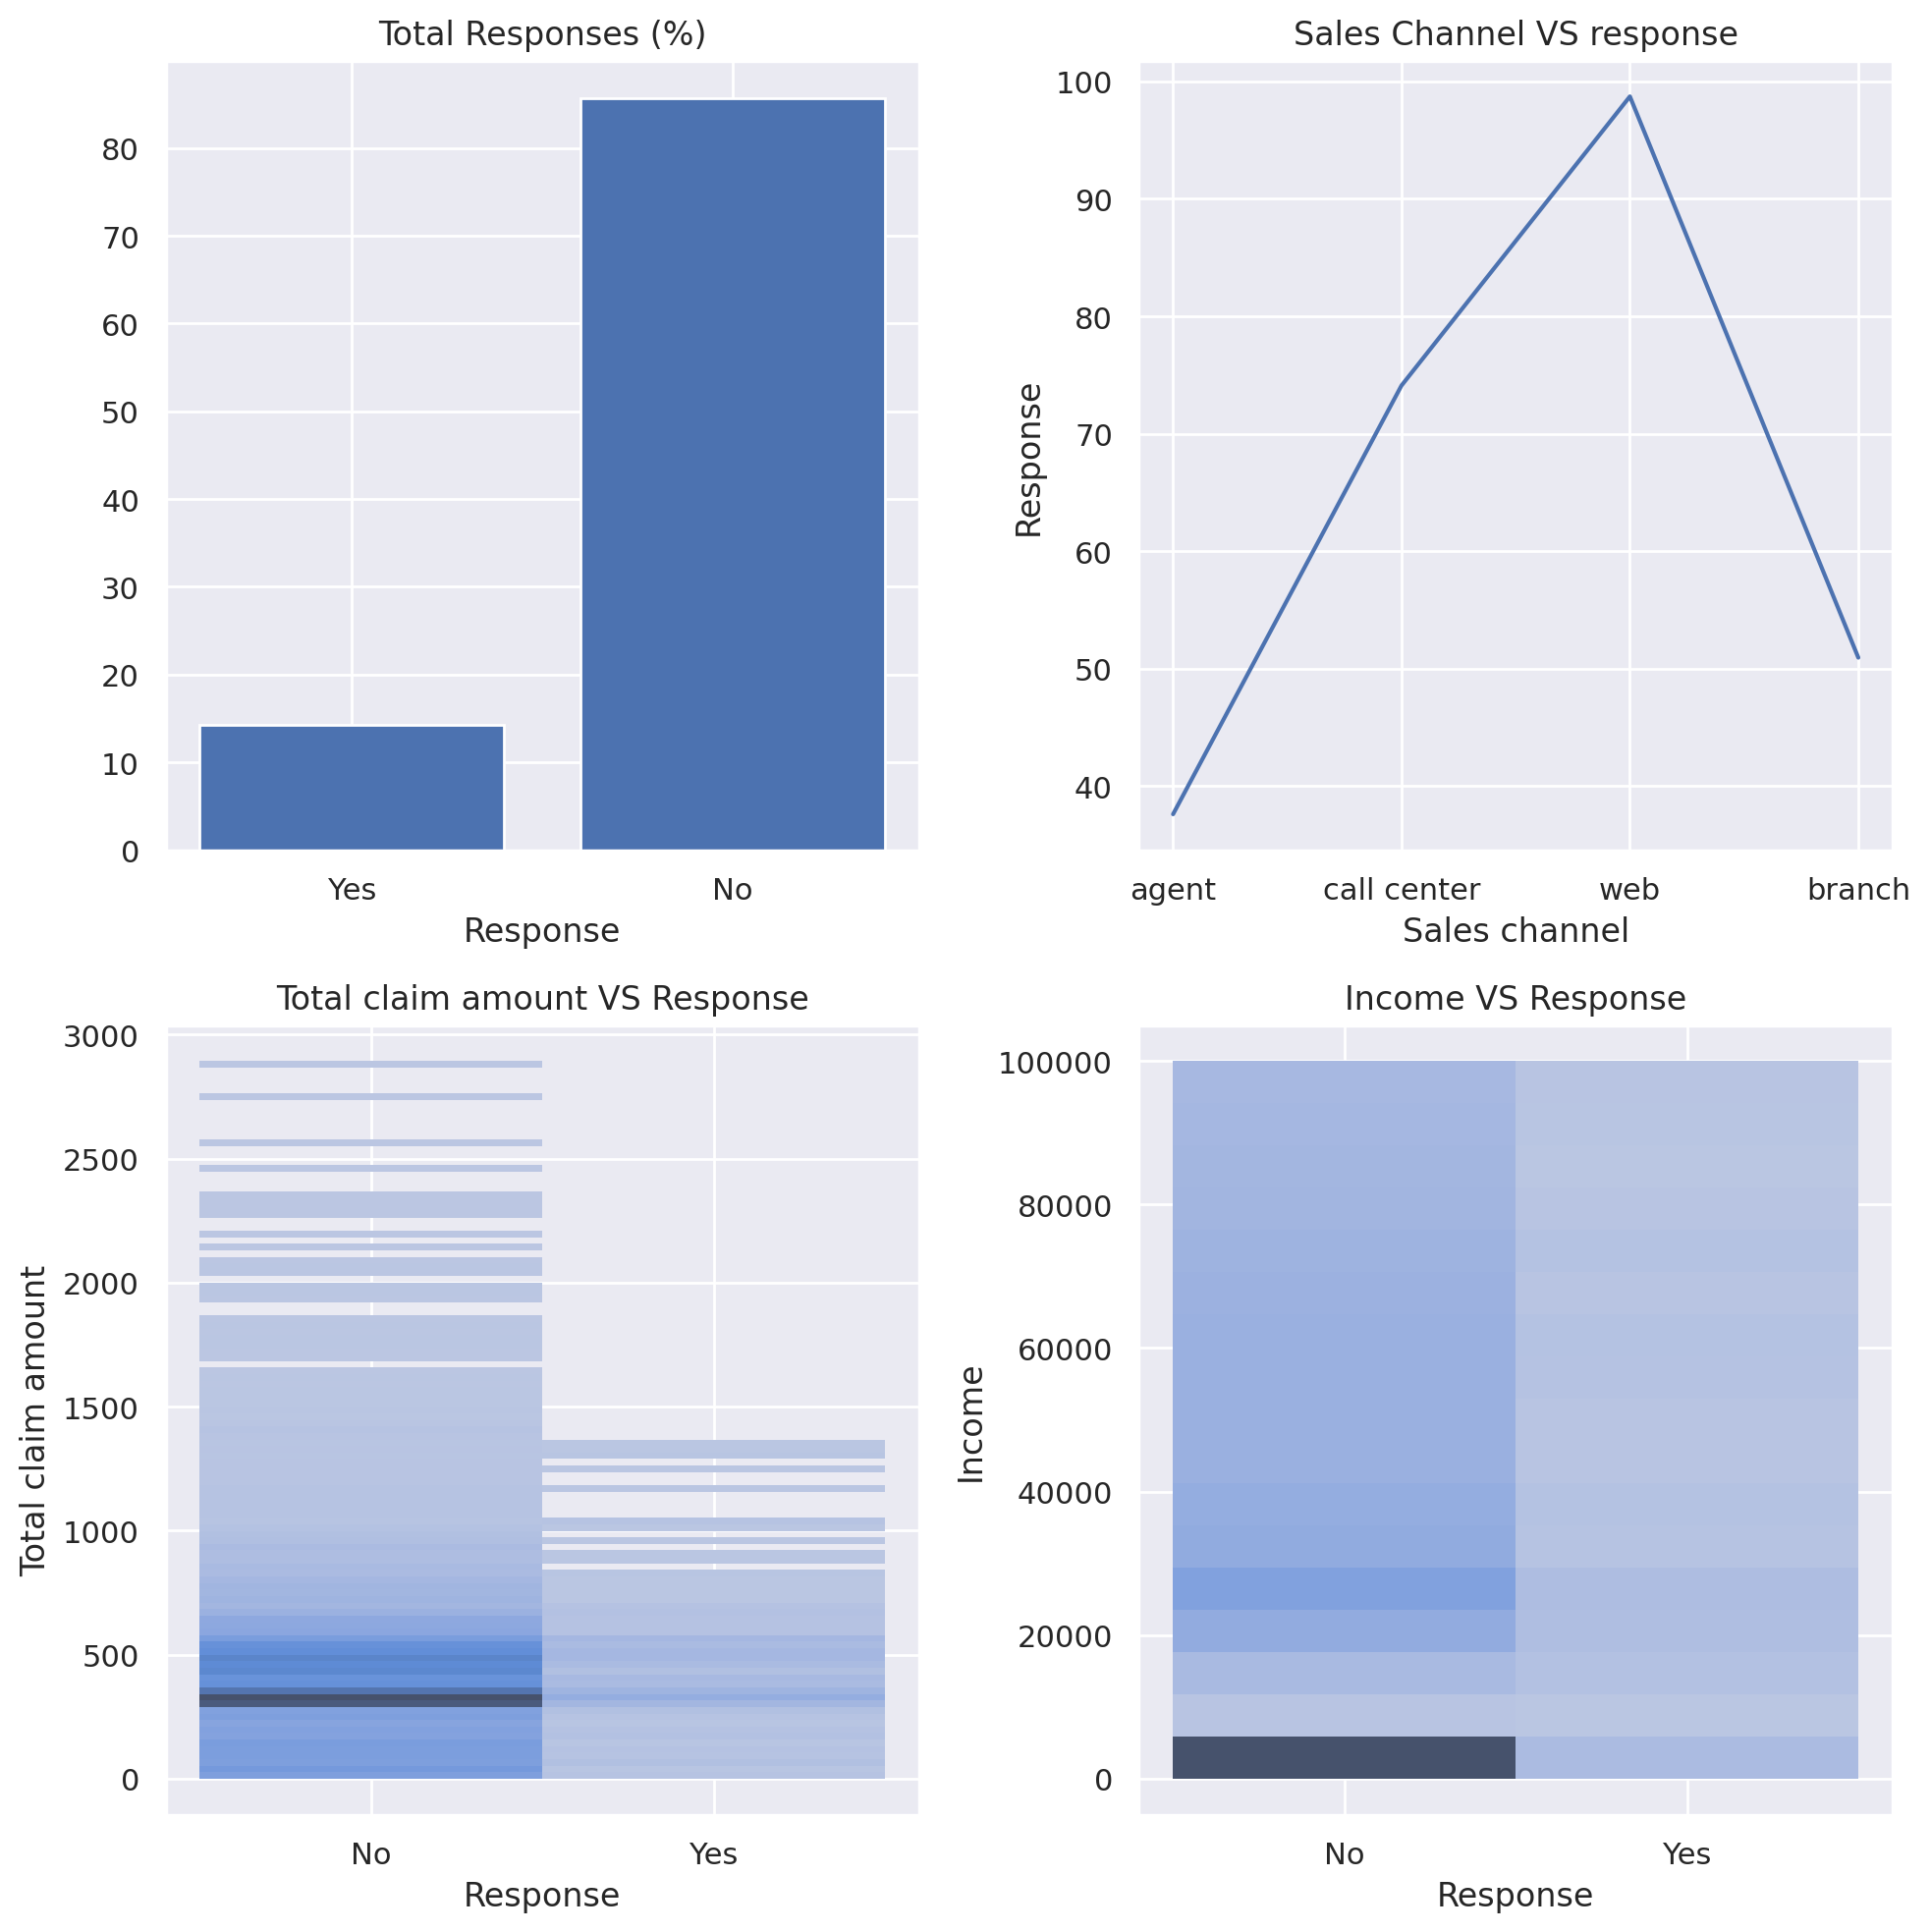

In [7]:
fig, axes = plt.subplots(2,2, figsize=(10,10), dpi=200)
#Total responses
axes[0,0].bar(response_tag, response_y)
axes[0,0].set_xlabel('Response')
axes[0,0].set_title('Total Responses (%)')
#Sales channel VS response
axes[0,1].plot(rate_channel_tag, rate_channel)
axes[0,1].set_xlabel('Sales channel')
axes[0,1].set_ylabel('Response')
axes[0,1].set_title('Sales Channel VS response')
#sns.histplot(data = data, x='sales_channel', y='response', ax = axes[0,1])
#Total claim amount VS Response
sns.histplot(data = data, x='response', y='total_claim_amount', ax = axes[1,0])
axes[1,0].set_xlabel('Response')
axes[1,0].set_ylabel('Total claim amount')
axes[1,0].set_title('Total claim amount VS Response')
sns.histplot(data = data, x='response', y='income', ax = axes[1,1])
axes[1,1].set_xlabel('Response')
axes[1,1].set_ylabel('Income')
axes[1,1].set_title('Income VS Response')
plt.tight_layout()

In [8]:
print(rate_channel_agent)
print(rate_channel_call_center)
print(rate_channel_web)
print(rate_channel_branch)

37.62
74.11
98.72
50.95


In [9]:
rate_channel_response = data[['sales_channel', 'response']].copy()
agent_yes = rate_channel_response[(rate_channel_response['sales_channel'].isin(['Agent']))  & rate_channel_response['response'].isin(['Yes'])].count()[1]
call_center_yes = rate_channel_response[(rate_channel_response['sales_channel'].isin(['Call Center']))  & rate_channel_response['response'].isin(['Yes'])].count()[1]
web_yes = rate_channel_response[(rate_channel_response['sales_channel'].isin(['Web']))  & rate_channel_response['response'].isin(['Yes'])].count()[1]
branch_yes = rate_channel_response[(rate_channel_response['sales_channel'].isin(['Branch']))  & rate_channel_response['response'].isin(['Yes'])].count()[1]
channel_freq = [agent_yes, call_center_yes, web_yes, branch_yes]

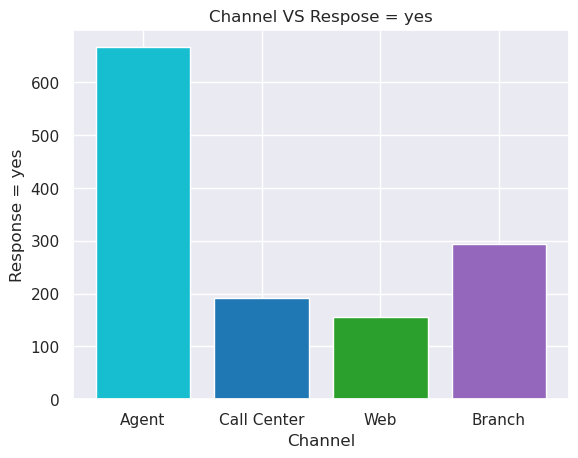

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
channel_tag = ['Agent', 'Call Center', 'Web', 'Branch']
counts = [40, 100, 30, 55]
bar_colors = ['tab:cyan', 'tab:blue', 'tab:green', 'tab:purple']
ax.bar(channel_tag, channel_freq, color=bar_colors)
ax.set_xlabel('Channel')
ax.set_ylabel('Response = yes')
ax.set_title('Channel VS Respose = yes')

plt.show()

In [11]:
data['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [12]:
agent_yes+ call_center_yes+ web_yes+branch_yes

1308

There is a considerable differnece between the conversion of agents VS the conversion of the Web channels.
Although the web channel arrives to more people, it has the lowest conversion rate, while the agents channel is the most effective (with more sales and less contacts).

**Total claim amount VS response**

In [13]:
tcr = data[['total_claim_amount', 'response']].copy()
tcr

total_claim_amount response
0                 384.81       No
1                1131.46       No
2                 566.47       No
3                 529.88       No
4                 138.13       No
...                  ...      ...
9129              198.23       No
9130              379.20      Yes
9131              790.78       No
9132              691.20       No
9133              369.60       No

[9134 rows x 2 columns]

In [14]:
tcr['total_claim_amount'].max()

2893.24

In [15]:
tcr['total_claim_amount'].min()

0.1

In [16]:
claim_1_yes = tcr[(tcr['total_claim_amount']<500) & tcr['response'].isin(['Yes'])].count()[1]
claim_2_yes = tcr[(tcr['total_claim_amount']>500)&(tcr['total_claim_amount']<1000) & tcr['response'].isin(['Yes'])].count()[1]
claim_3_yes = tcr[(tcr['total_claim_amount']>1000)&(tcr['total_claim_amount']<1500) & tcr['response'].isin(['Yes'])].count()[1]
claim_4_yes = tcr[(tcr['total_claim_amount']>1500)&(tcr['total_claim_amount']<2000) & tcr['response'].isin(['Yes'])].count()[1]
claim_5_yes = tcr[(tcr['total_claim_amount']>2000)&(tcr['total_claim_amount']<2500) & tcr['response'].isin(['Yes'])].count()[1]
claim_6_yes = tcr[(tcr['total_claim_amount']>2500)&(tcr['total_claim_amount']<3000) & tcr['response'].isin(['Yes'])].count()[1]

In [17]:
claim_1_no = tcr[(tcr['total_claim_amount']<500) & tcr['response'].isin(['No'])].count()[1]
claim_2_no = tcr[(tcr['total_claim_amount']>500)&(tcr['total_claim_amount']<1000) & tcr['response'].isin(['No'])].count()[1]
claim_3_no = tcr[(tcr['total_claim_amount']>1000)&(tcr['total_claim_amount']<1500) & tcr['response'].isin(['No'])].count()[1]
claim_4_no = tcr[(tcr['total_claim_amount']>1500)&(tcr['total_claim_amount']<2000) & tcr['response'].isin(['No'])].count()[1]
claim_5_no = tcr[(tcr['total_claim_amount']>2000)&(tcr['total_claim_amount']<2500) & tcr['response'].isin(['No'])].count()[1]
claim_6_no = tcr[(tcr['total_claim_amount']>2500)&(tcr['total_claim_amount']<3000) & tcr['response'].isin(['No'])].count()[1]

In [18]:
claim_yes = [claim_1_yes, claim_2_yes, claim_3_yes, claim_4_yes, claim_5_yes, claim_6_yes]
claim_no = [claim_1_no, claim_2_no, claim_3_no, claim_4_no, claim_5_no, claim_6_no]
total_claims = 0
for i in claim_yes:
    total_claims += i
for i in claim_no:
    total_claims += i
total_claims

9134

Text(0.5, 1.0, 'Claim amount VS response = No')

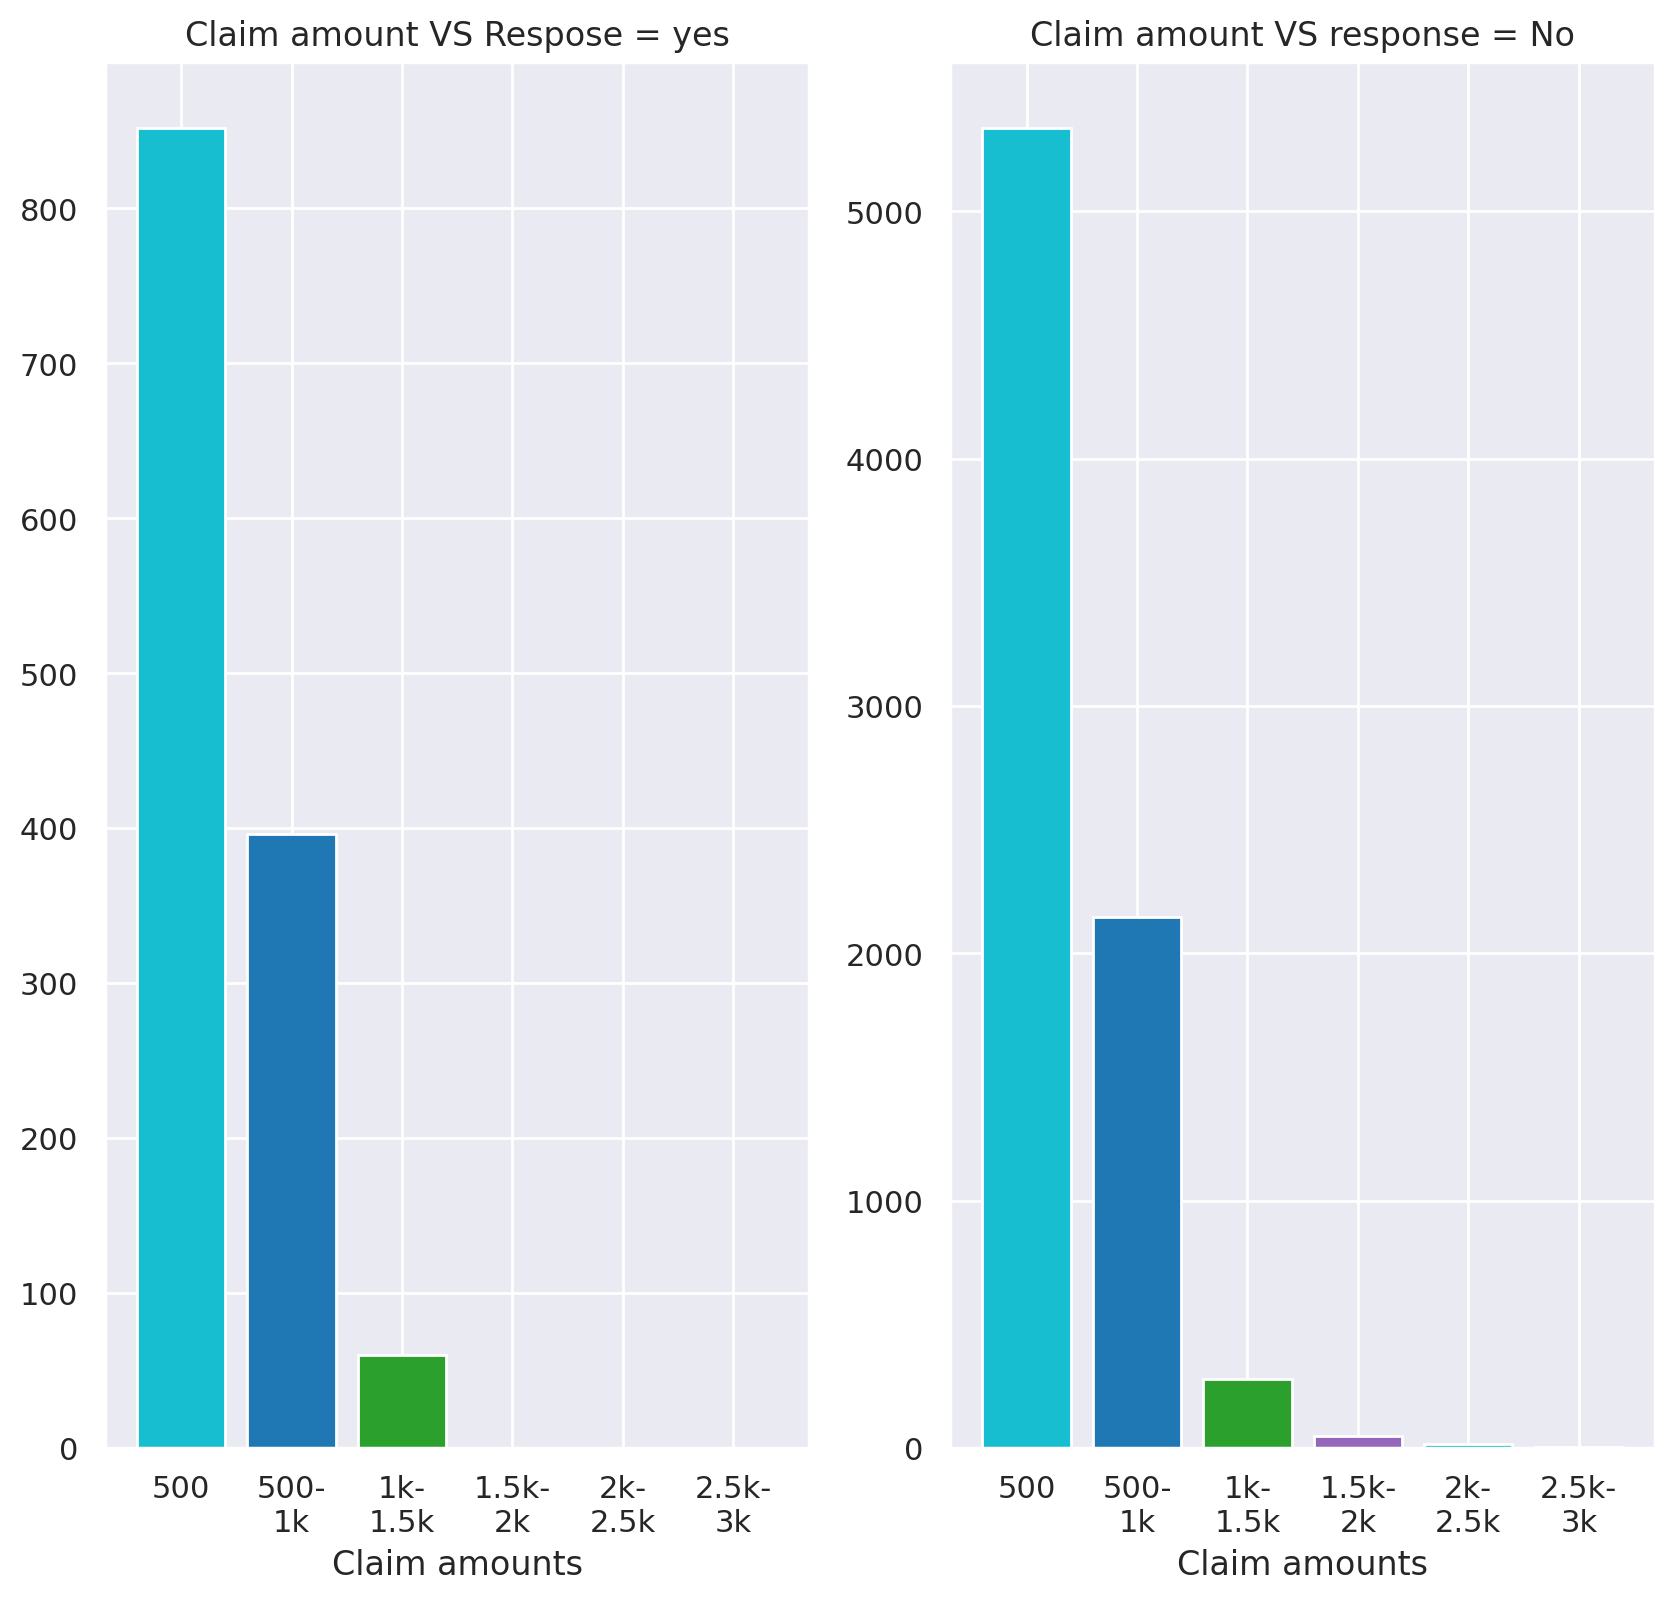

In [19]:
fig, axes = plt.subplots(1,2, figsize=(10,9), dpi=200)
claim_amount = ['500', '500-\n1k', '1k-\n1.5k', '1.5k-\n2k', '2k-\n2.5k', '2.5k-\n3k']
#Total responses
axes[0].bar(claim_amount, claim_yes, color=bar_colors)
axes[0].set_xlabel('Claim amounts')
axes[0].set_title('Claim amount VS Respose = yes')
#Sales channel VS response
axes[1].bar(claim_amount, claim_no, color=bar_colors)
axes[1].set_xlabel('Claim amounts')
axes[1].set_title('Claim amount VS response = No')
#sns.histplot(data = data, x='sales_channel', y='response', ax = axes[0,1])
#Total claim amount VS Response

**Lab | Customer Analysis Round 4**

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [20]:
#Column types
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [21]:
#Split by type
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include='object')

numerical

customer_lifetime_value  income  monthly_premium_auto  \
0                     2763.52   56274                    69   
1                     6979.54       0                    94   
2                    12887.43   48767                   108   
3                     7645.86       0                   106   
4                     2813.69   43836                    73   
...                       ...     ...                   ...   
9129                 23405.99   71941                    73   
9130                  3096.51   21604                    79   
9131                  8163.89       0                    85   
9132                  7524.44   21941                    96   
9133                  2611.84       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1              384.81  
1                             0                   8             1131.46  
2                             0                   2              566.47  
3                             0                   7              529.88  
4                             0                   1              138.13  
...                         ...                 ...                 ...  
9129                          0                   2              198.23  
9130                          0                   1              379.20  
9131                          3                   2              790.78  
9132                          0                   3              691.20  
9133                          0                   1              369.60  

[9134 rows x 8 columns]

In [22]:
categorical

customer       state response  coverage education effective_to_date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor           2/10/11   
9130  PK87824  California      Yes  Extended   College           2/12/11   
9131  TD14365  California       No  Extended  Bachelor            2/6/11   
9132  UP19263  California       No  Extended   College            2/3/11   
9133  Y167826  California       No  Extended   College           2/14/11   

     employmentstatus gender location_code marital_status     policy_type  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Single   Personal Auto   
2            Employed      F      Suburban        Married   Personal Auto   
3          Unemployed      M      Suburban        Married  Corporate Auto   
4            Employed      M         Rural         Single   Personal Auto   
...               ...    ...           ...            ...             ...   
9129         Employed      M         Urban        Married   Personal Auto   
9130         Employed      F      Suburban       Divorced  Corporate Auto   
9131       Unemployed      M      Suburban         Single  Corporate Auto   
9132         Employed      M      Suburban        Married   Personal Auto   
9133       Unemployed      M      Suburban         Single  Corporate Auto   

            policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0     Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1      Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2      Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3     Corporate L2           Offer1   Call Center            SUV      Medsize  
4      Personal L1           Offer1         Agent  Four-Door Car      Medsize  
...            ...              ...           ...            ...          ...  
9129   Personal L1           Offer2           Web  Four-Door Car      Medsize  
9130  Corporate L3           Offer1        Branch  Four-Door Car      Medsize  
9131  Corporate L2           Offer1        Branch  Four-Door Car      Medsize  
9132   Personal L2           Offer3        Branch  Four-Door Car        Large  
9133  Corporate L3           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 16 columns]

Now we will try to check the normality of the numerical variables visually

Use seaborn library to construct distribution plots for the numerical variables

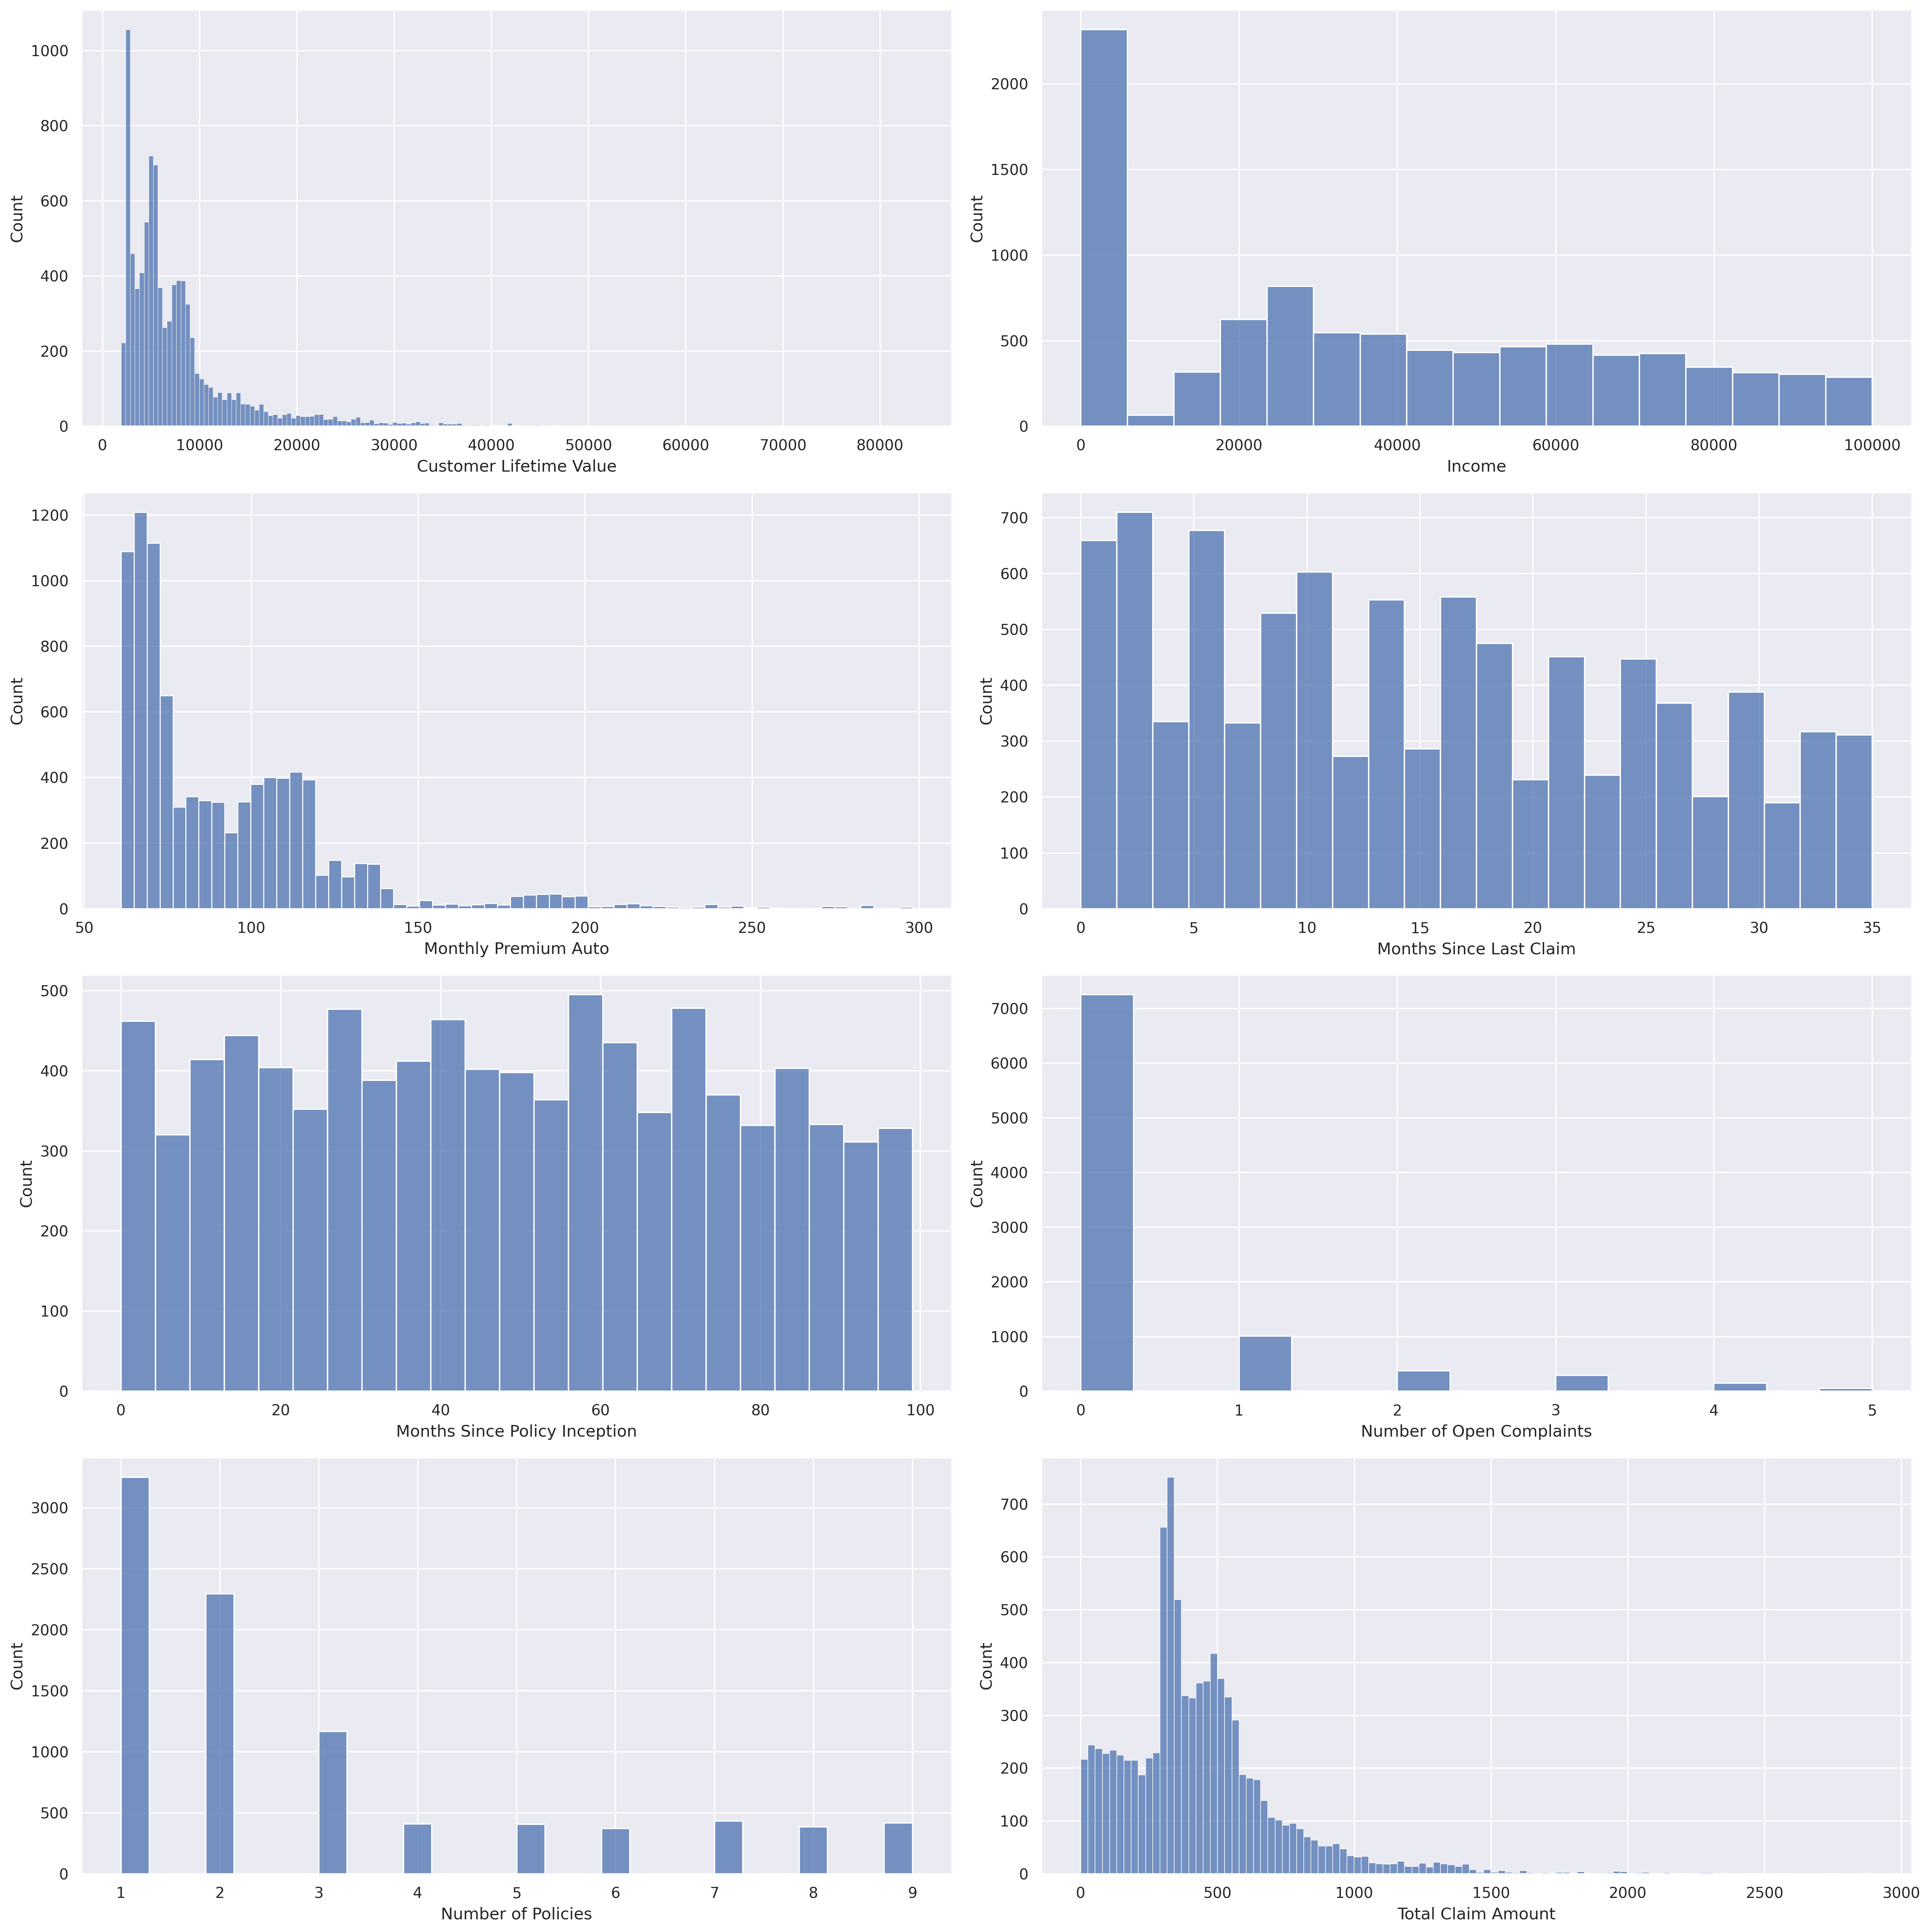

In [23]:
fig, axes = plt.subplots(4,2,figsize=(20,20), dpi=300)
sns.histplot(data = numerical, x='customer_lifetime_value', ax = axes[0,0])
axes[0,0].set_xlabel('Customer Lifetime Value')
sns.histplot(data = numerical, x='income', ax = axes[0,1])
axes[0,1].set_xlabel('Income')
sns.histplot(data = numerical, x='monthly_premium_auto', ax = axes[1,0])
axes[1,0].set_xlabel('Monthly Premium Auto')
sns.histplot(data = numerical, x='months_since_last_claim', ax = axes[1,1])
axes[1,1].set_xlabel('Months Since Last Claim')
sns.histplot(data = numerical, x='months_since_policy_inception', ax = axes[2,0])
axes[2,0].set_xlabel('Months Since Policy Inception')
sns.histplot(data = numerical, x='number_of_open_complaints', ax = axes[2,1])
axes[2,1].set_xlabel('Number of Open Complaints')
sns.histplot(data = numerical, x='number_of_policies', ax = axes[3,0])
axes[3,0].set_xlabel('Number of Policies')
sns.histplot(data = numerical, x='total_claim_amount', ax = axes[3,1])
axes[3,1].set_xlabel('Total Claim Amount')
plt.tight_layout()

Use Matplotlib to construct histograms


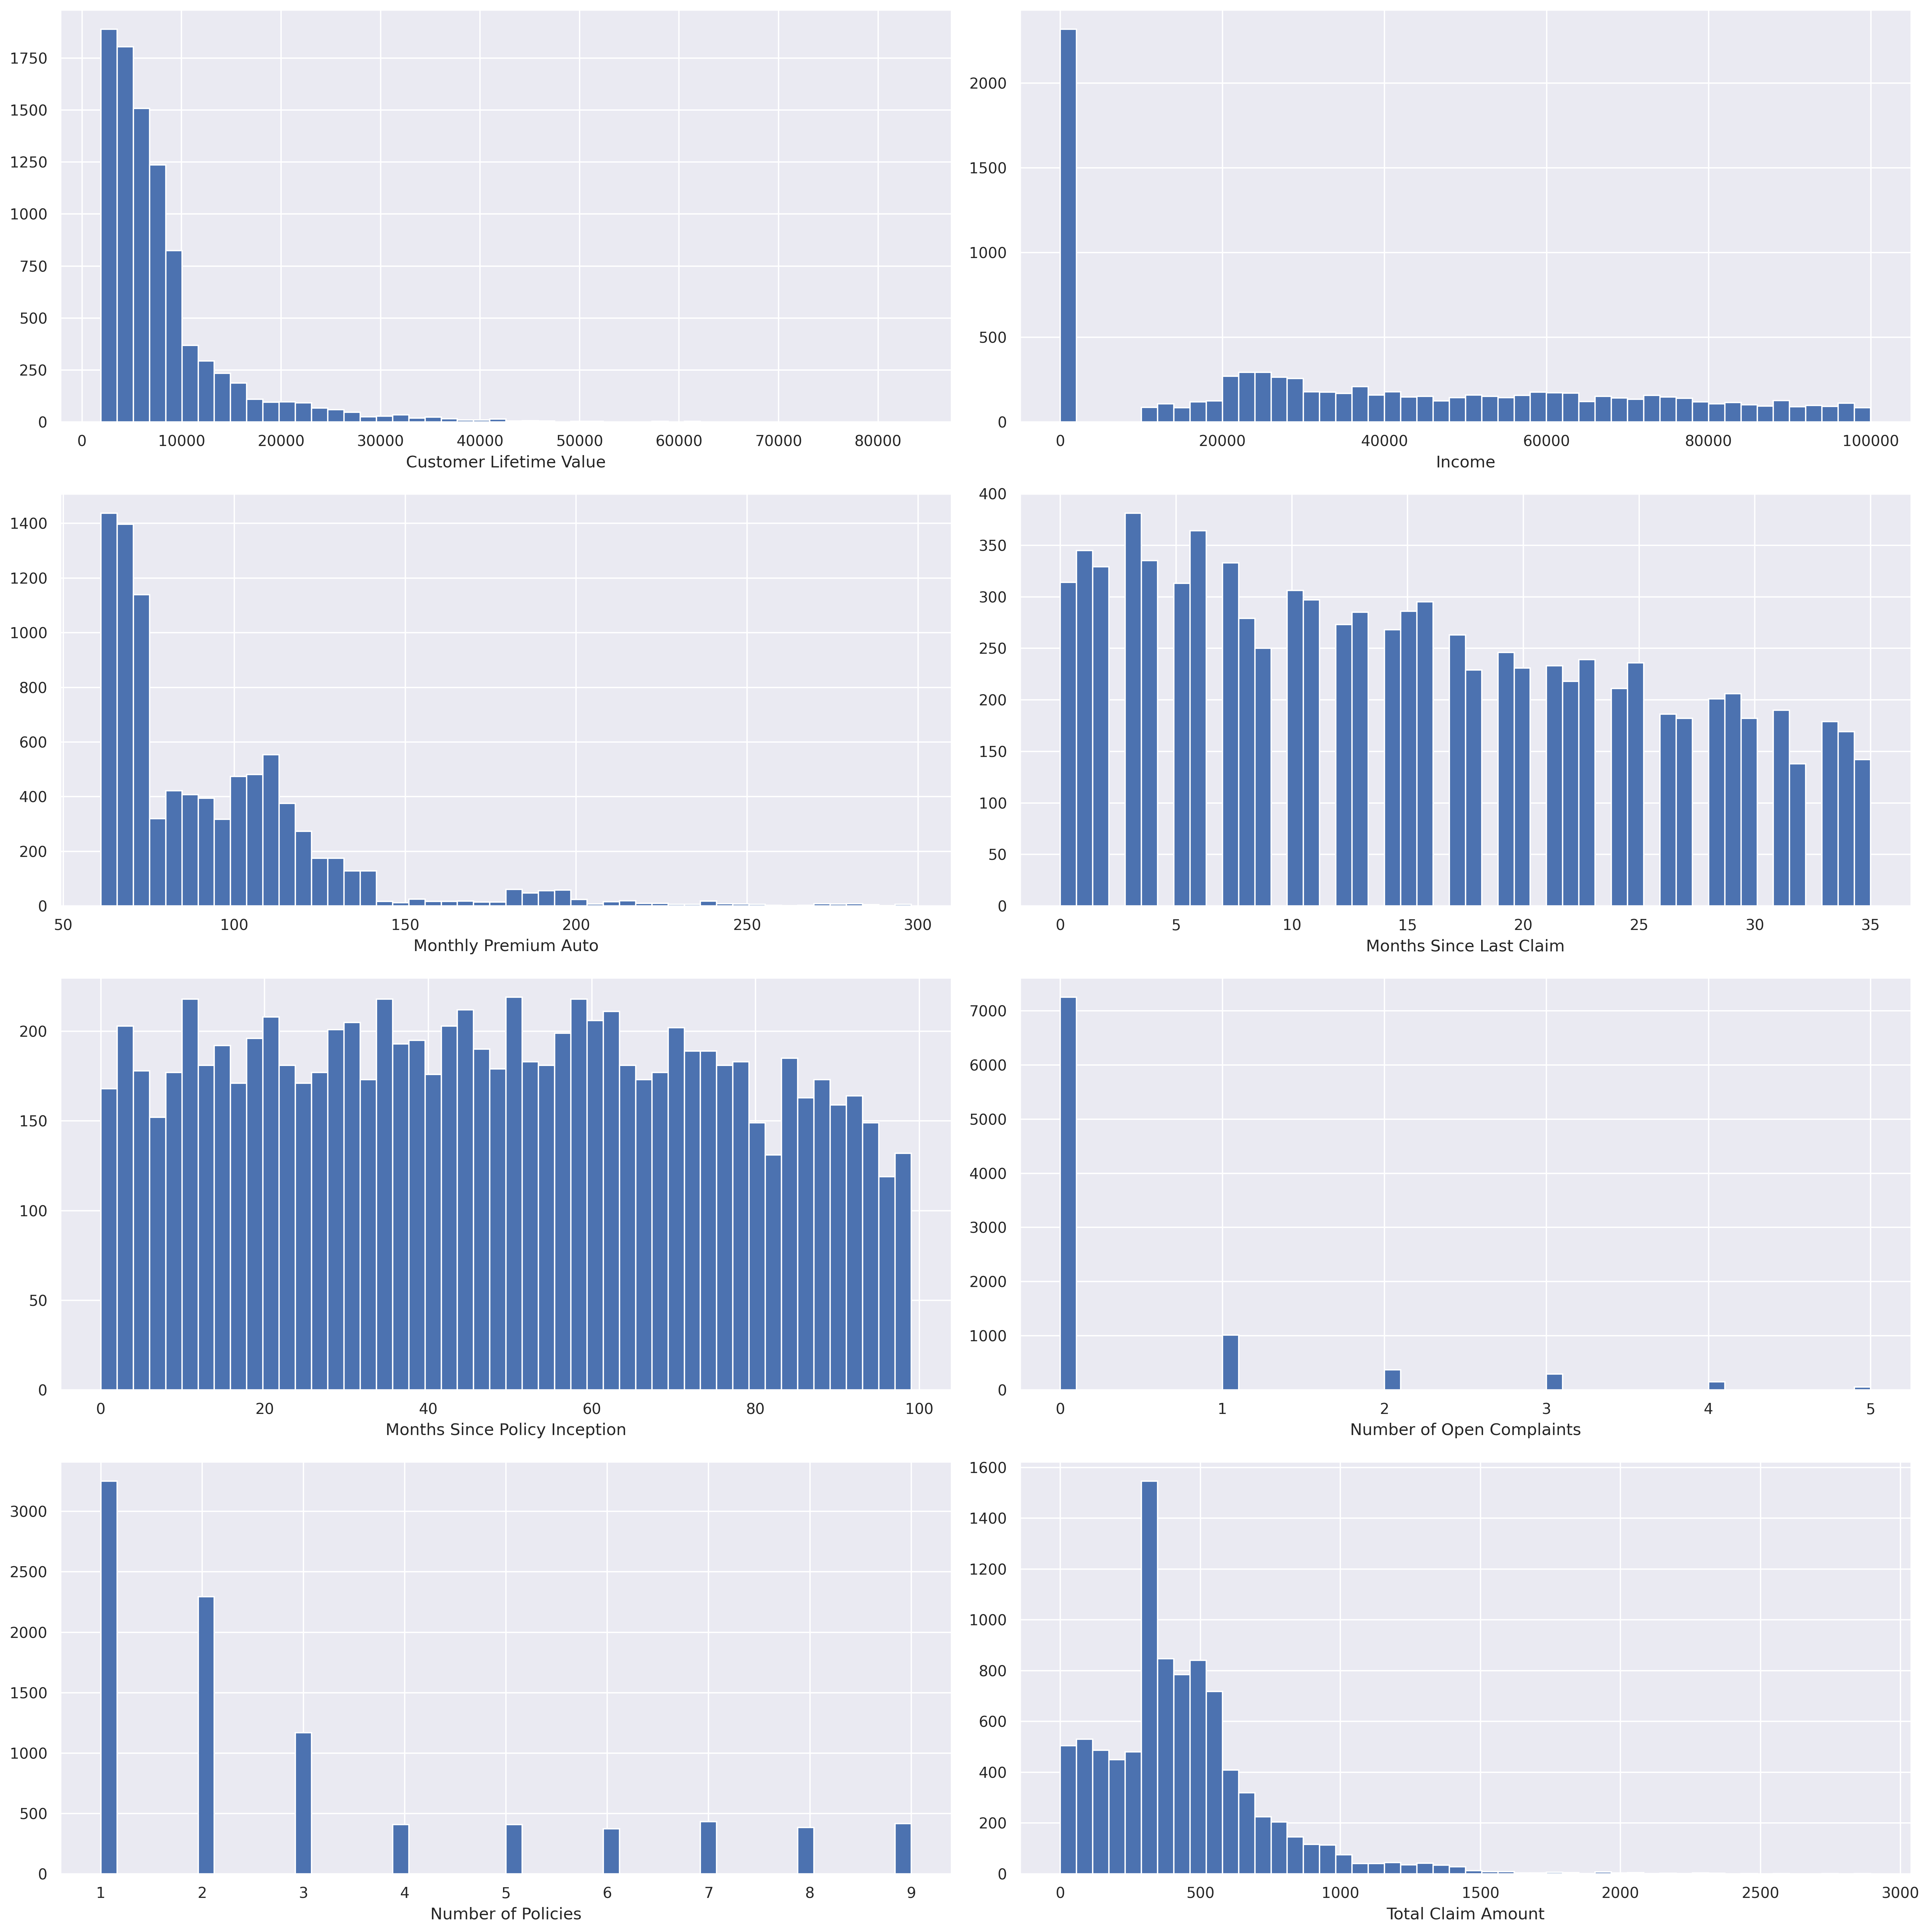

In [24]:
fig, axes = plt.subplots(4,2,figsize=(20,20), dpi=300)
axes[0,0].hist(x=numerical['customer_lifetime_value'], bins=50)
axes[0,0].set_xlabel('Customer Lifetime Value')
axes[0,1].hist(x=numerical['income'], bins=50)
axes[0,1].set_xlabel('Income')
axes[1,0].hist(x=numerical['monthly_premium_auto'], bins=50)
axes[1,0].set_xlabel('Monthly Premium Auto')
axes[1,1].hist(x=numerical['months_since_last_claim'], bins=50)
axes[1,1].set_xlabel('Months Since Last Claim')
axes[2,0].hist(x=numerical['months_since_policy_inception'], bins=50)
axes[2,0].set_xlabel('Months Since Policy Inception')
axes[2,1].hist(x=numerical['number_of_open_complaints'], bins=50)
axes[2,1].set_xlabel('Number of Open Complaints')
axes[3,0].hist(x=numerical['number_of_policies'], bins=50)
axes[3,0].set_xlabel('Number of Policies')
axes[3,1].hist(x=numerical['total_claim_amount'], bins=50)
axes[3,1].set_xlabel('Total Claim Amount')
plt.tight_layout()
plt.show()

Do the distributions for different numerical variables look like a normal distribution?

Far from it!

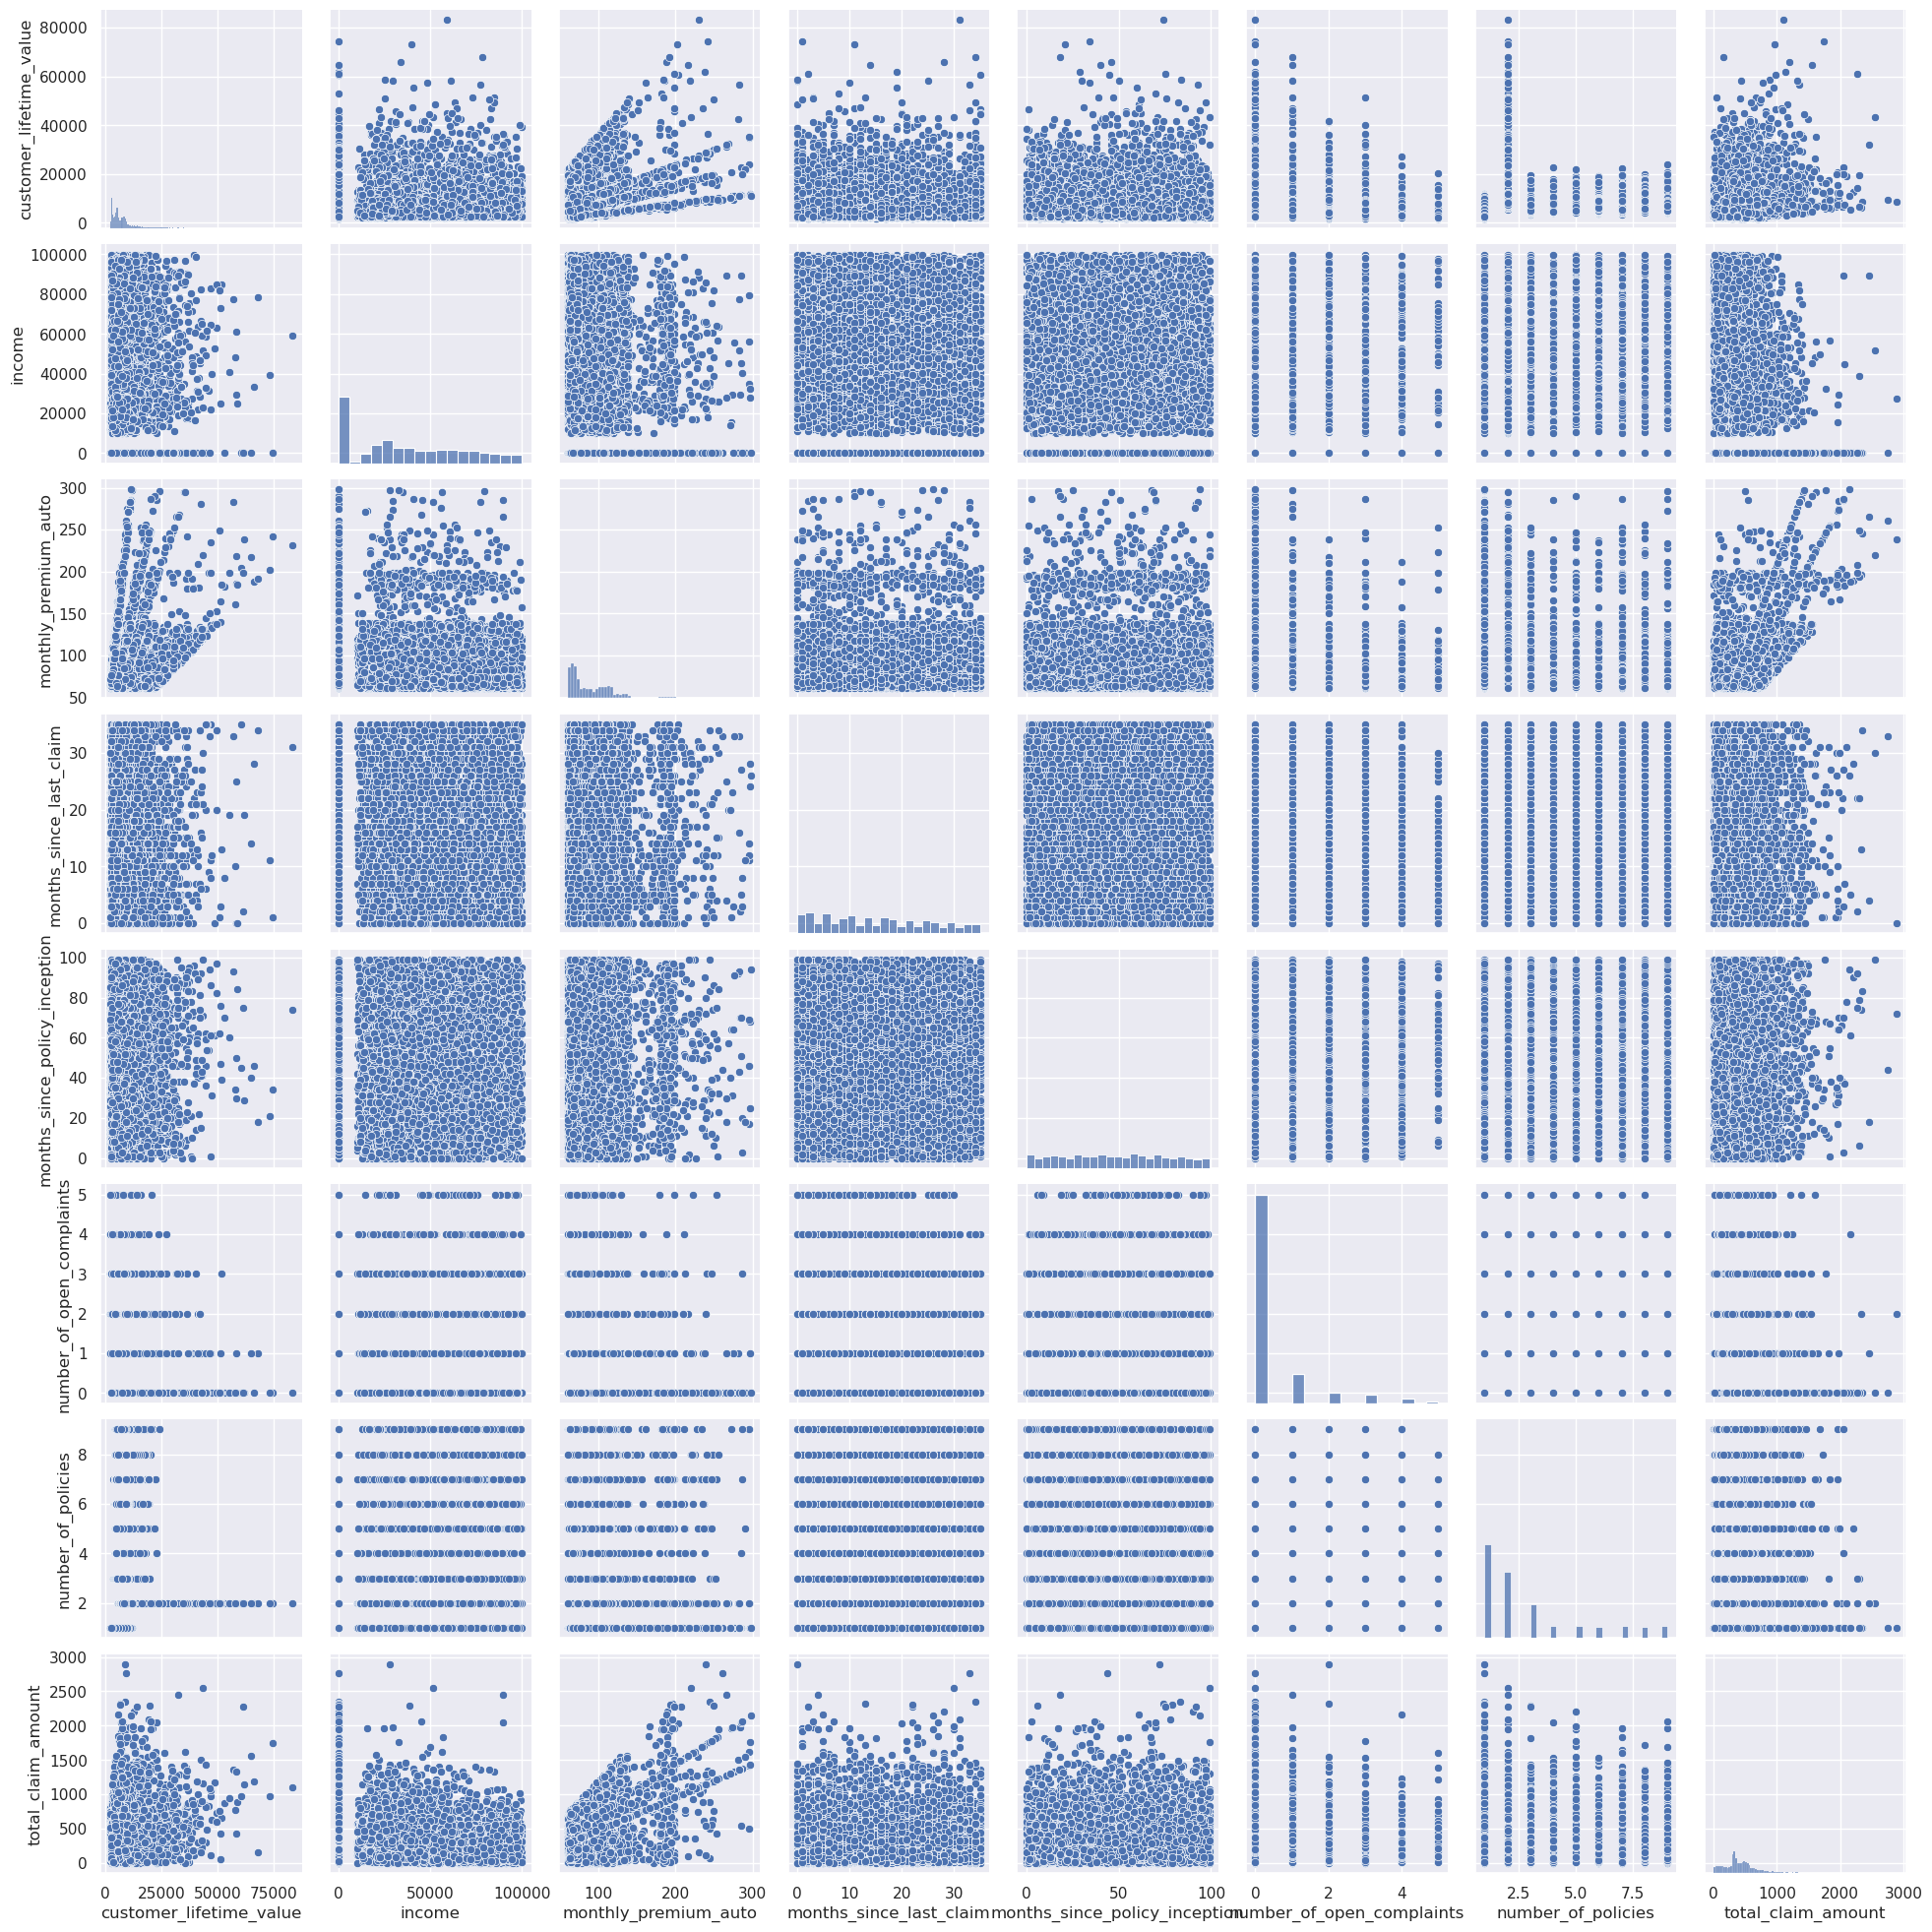

In [25]:
sns.pairplot(numerical)

Considering the above graphs, we can already see clearly that there are 5 columns that are heavily skewed to the right:
Customer lifetime value, Monthly premium auto, Number of policies and Total claim amount and Number of open complaints.

The income column is heavily impacted by the customers with income 0, if that data was excluded it would look way more standard.

Months since last claim and months since policy inception columns look pretty standard. We will check them in more detail via boxplot, and below the income:

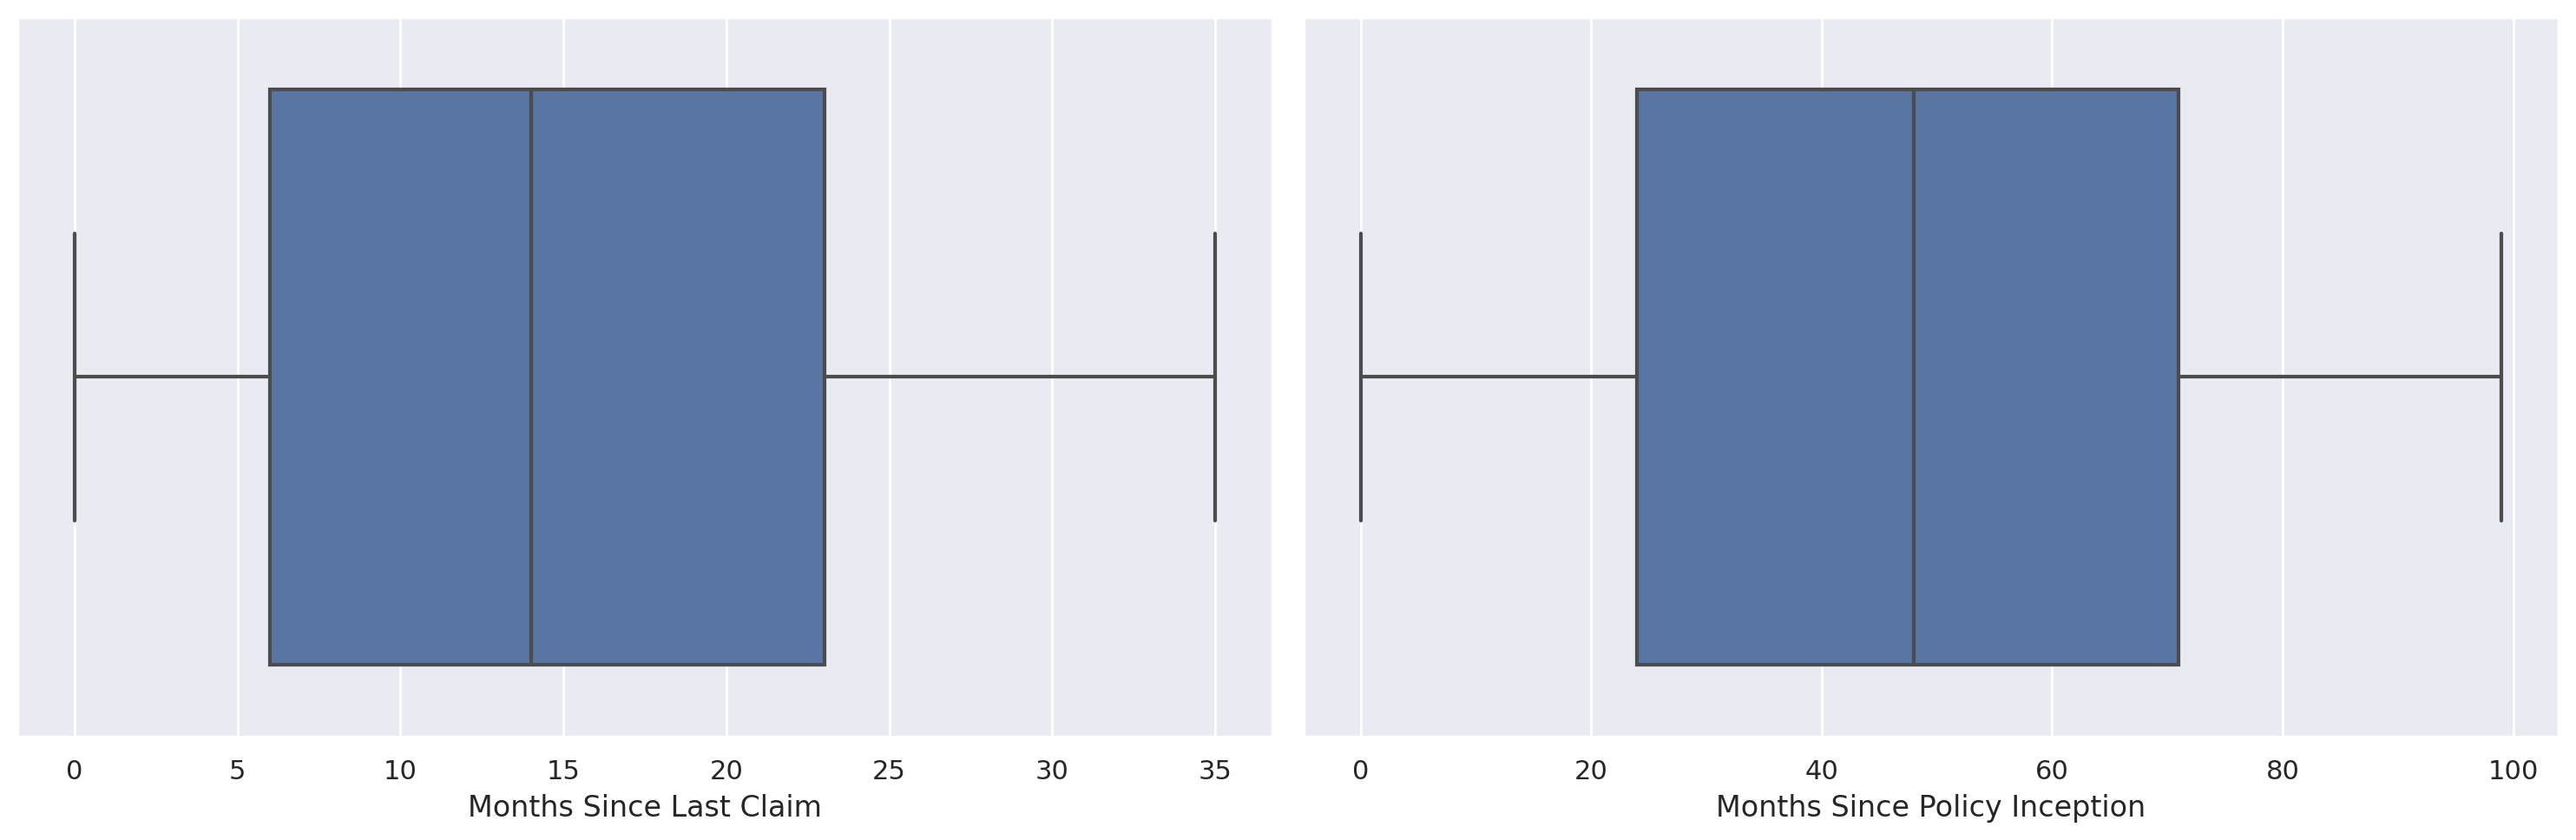

In [26]:
fig, axes = plt.subplots(1,2,figsize=(15,5), dpi=200)

sns.boxplot(data = numerical, x='months_since_last_claim', ax = axes[0])
axes[0].set_xlabel('Months Since Last Claim')
sns.boxplot(data = numerical, x='months_since_policy_inception', ax = axes[1])
axes[1].set_xlabel('Months Since Policy Inception')
plt.tight_layout()

In [27]:
income0excl = []
for i in data['income']:
    if i>0:
        income0excl.append(i)
    else:
        pass
    
income_positive = pd.DataFrame (income0excl, columns = ['income'])

Text(0.5, 0, 'Income - excluding 0 values')

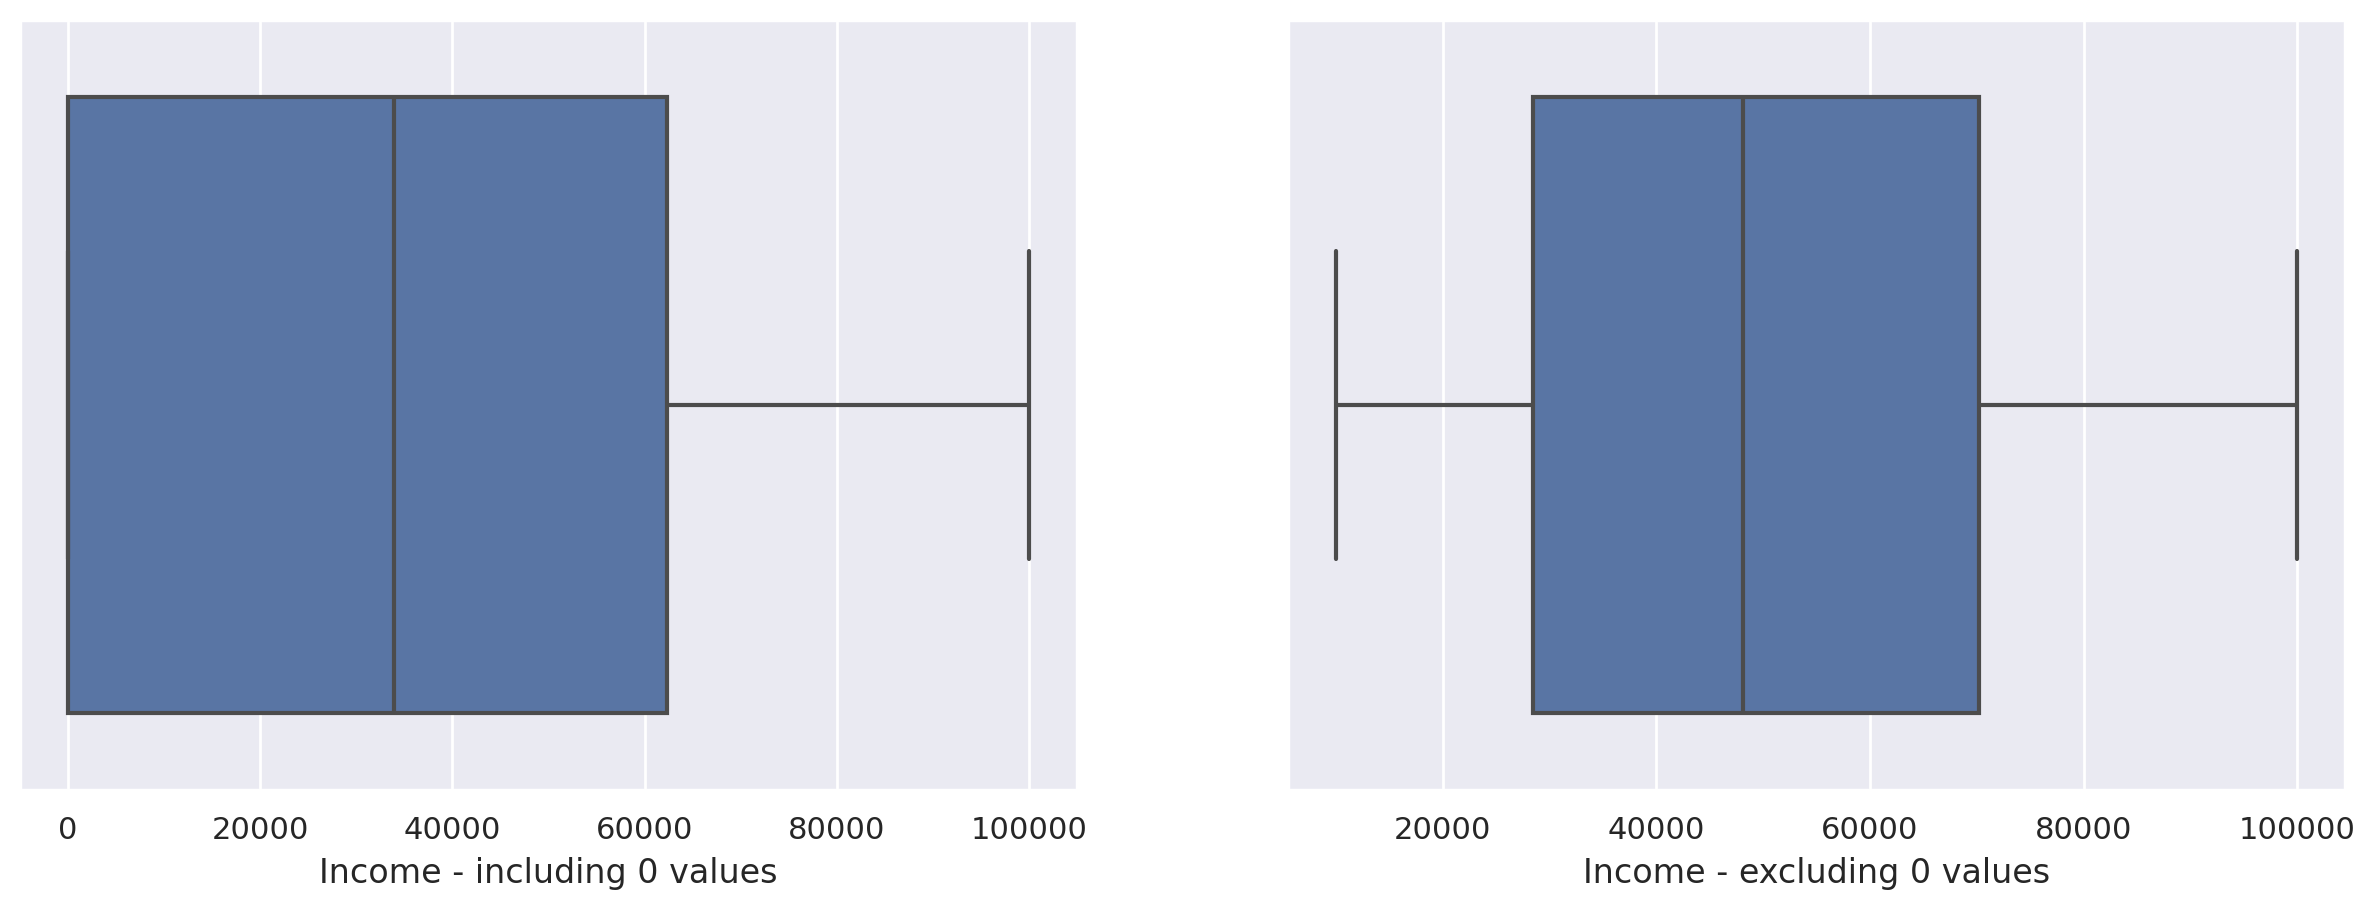

In [28]:
fig, axes = plt.subplots(1,2,figsize=(15,5), dpi=200)
sns.boxplot(data = data, x='income', ax=axes[0])
axes[0].set_xlabel('Income - including 0 values')
sns.boxplot(data = income_positive, x='income', ax=axes[1])
axes[1].set_xlabel('Income - excluding 0 values')

We can see that after removing the customers with zero income the distribution is way more standard, see also histogram:

Text(0.5, 0, 'Income - excluding 0 values')

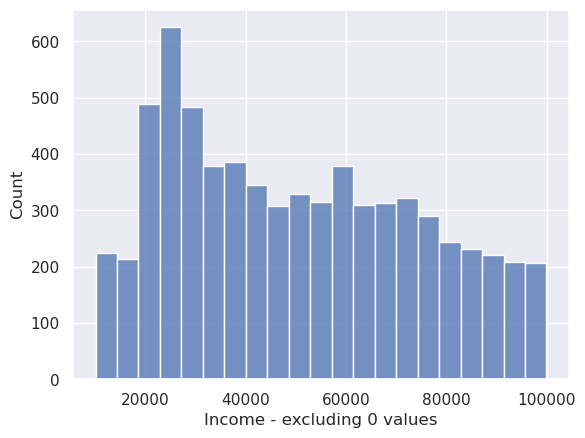

In [29]:
fig, ax = plt.subplots()
sns.histplot(data = income_positive, x='income')
ax.set_xlabel('Income - excluding 0 values')

In [30]:
correlations_matrix = numerical.corr()
correlations_matrix

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   
number_of_open_complaints                 -0.013122                 0.005354   
number_of_policies                        -0.011233                 0.009136   
total_claim_amount                         0.632017                 0.007563   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.001158   
number_of_policies                                 -0.013333   
total_claim_amount                                  0.003335   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   
number_of_open_complaints                       1.000000            0.001498   
number_of_policies                              0.001498            1.000000   
total_claim_amount                             -0.014241           -0.002354   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335  
number_of_open_complaints               -0.014241  
number_of_policies                      -0.002354  
total_claim_amount                       1.000000

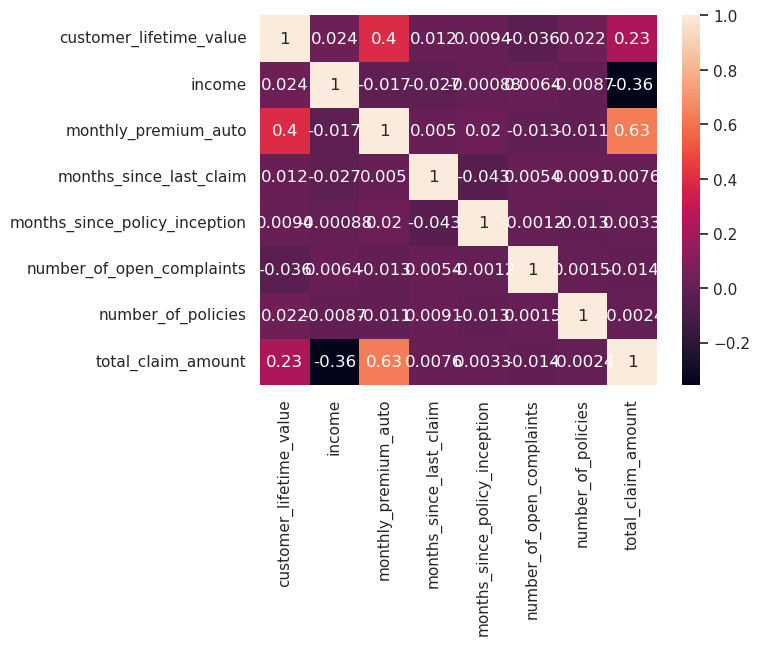

In [31]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Total claim amount and monthly premium auto are the only values with a minimal correlation (0.63)

**Lab | Customer Analysis Round 5**

**Processing Data**

(Further processing...)
X-y split.
Normalize (numerical).

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [33]:
#Drop target_d column
X = numerical.drop(['total_claim_amount'], axis=1)
y = numerical['monthly_premium_auto']
X

customer_lifetime_value  income  monthly_premium_auto  \
0                     2763.52   56274                    69   
1                     6979.54       0                    94   
2                    12887.43   48767                   108   
3                     7645.86       0                   106   
4                     2813.69   43836                    73   
...                       ...     ...                   ...   
9129                 23405.99   71941                    73   
9130                  3096.51   21604                    79   
9131                  8163.89       0                    85   
9132                  7524.44   21941                    96   
9133                  2611.84       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  
0                             0                   1  
1                             0                   8  
2                             0                   2  
3                             0                   7  
4                             0                   1  
...                         ...                 ...  
9129                          0                   2  
9130                          0                   1  
9131                          3                   2  
9132                          0                   3  
9133                          0                   1  

[9134 rows x 7 columns]

In [34]:
y

0        69
1        94
2       108
3       106
4        73
       ... 
9129     73
9130     79
9131     85
9132     96
9133     77
Name: monthly_premium_auto, Length: 9134, dtype: int64

In [35]:
X_nrm = X.copy()
X_std = X.copy()

In [36]:
transformer = MinMaxScaler().fit(X_nrm)
x_normalized = transformer.transform(X_nrm)
x_normalized = pd.DataFrame(x_normalized, columns=X_nrm.columns)
x_normalized

customer_lifetime_value    income  monthly_premium_auto  \
0                    0.010629  0.562847              0.033755   
1                    0.062406  0.000000              0.139241   
2                    0.134960  0.487763              0.198312   
3                    0.070589  0.000000              0.189873   
4                    0.011245  0.438443              0.050633   
...                       ...       ...                   ...   
9129                 0.264137  0.719547              0.050633   
9130                 0.014719  0.216081              0.075949   
9131                 0.076951  0.000000              0.101266   
9132                 0.069098  0.219452              0.147679   
9133                 0.008766  0.000000              0.067511   

      months_since_last_claim  months_since_policy_inception  \
0                    0.914286                       0.050505   
1                    0.371429                       0.424242   
2                    0.514286                       0.383838   
3                    0.514286                       0.656566   
4                    0.342857                       0.444444   
...                       ...                            ...   
9129                 0.514286                       0.898990   
9130                 0.400000                       0.282828   
9131                 0.257143                       0.373737   
9132                 0.971429                       0.030303   
9133                 0.085714                       0.909091   

      number_of_open_complaints  number_of_policies  
0                           0.0               0.000  
1                           0.0               0.875  
2                           0.0               0.125  
3                           0.0               0.750  
4                           0.0               0.000  
...                         ...                 ...  
9129                        0.0               0.125  
9130                        0.0               0.000  
9131                        0.6               0.125  
9132                        0.0               0.250  
9133                        0.0               0.000  

[9134 rows x 7 columns]

In [37]:
transformer = StandardScaler().fit(X_std)
x_standardized = transformer.transform(X_std)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_std.columns)

(9134, 7)


customer_lifetime_value    income  monthly_premium_auto  \
0                   -0.762878  0.612827             -0.703925   
1                   -0.149245 -1.239617              0.022691   
2                    0.710636  0.365710              0.429596   
3                   -0.052263 -1.239617              0.371467   
4                   -0.755575  0.203390             -0.587666   
...                       ...       ...                   ...   
9129                 2.241590  1.128558             -0.587666   
9130                -0.714412 -0.528450             -0.413278   
9131                 0.023135 -1.239617             -0.238891   
9132                -0.069936 -0.517356              0.080820   
9133                -0.784954 -1.239617             -0.471408   

      months_since_last_claim  months_since_policy_inception  \
0                    1.678099                      -1.543287   
1                   -0.208186                      -0.217334   
2                    0.288205                      -0.360680   
3                    0.288205                       0.606907   
4                   -0.307465                      -0.145661   
...                       ...                            ...   
9129                 0.288205                       1.466984   
9130                -0.108908                      -0.719046   
9131                -0.605299                      -0.396517   
9132                 1.876656                      -1.614960   
9133                -1.200968                       1.502821   

      number_of_open_complaints  number_of_policies  
0                     -0.422250           -0.822648  
1                     -0.422250            2.106160  
2                     -0.422250           -0.404247  
3                     -0.422250            1.687759  
4                     -0.422250           -0.822648  
...                         ...                 ...  
9129                  -0.422250           -0.404247  
9130                  -0.422250           -0.822648  
9131                   2.873245           -0.404247  
9132                  -0.422250            0.014154  
9133                  -0.422250           -0.822648  

[9134 rows x 7 columns]